<a href="https://colab.research.google.com/github/mrklees/learning-agents/blob/master/1_First_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Steps into RL

As a getting started, let's walk through the [tutorial written by Arthur Juliani on Medium.](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)  It will give us a nice, practical orientation to the subject.  It focuses on using games from the OpenAI gym as a testing ground.  

## First Algorithm: Q-Learning with a table of values
In these first few notebooks we will be learning about the Q-Learning algorithm. The first example is the simplest case, and doesn't even use a neural network, but will hopefully give us a bit of intuition about what later implementations of the algorithm are doing.

So how does the algorithm work.  Our Q-table maps every possible state/action combination to a reward. Each state is encoded in the rows and actions in the columns.  This becomes more concrete if we introduce our game: Frozen Lake. 

Frozen Lake is a game consisting of a 4 by 4 grid.  Our agent is placed on one side of the grid and must navigate the grid to a goal across the grid. There are some obstacles as well which kill the agent upon running into them.

The Q-Table will clearly be (4x4=) 16 rows (denoted $s$) with 4 columns (denoted $a$), which we will initialize at 0.  It is then updated after each step per the Bellman equation.  

$$ Q(s, a) = r + \gamma(max(Q(s', a')) $$

In English, this says that the value of each entry in the table, $Q(s, a)$, is given by the current known reward $r$ plus the maximum possible reward for the next state ($s'$) we would end up in. $\gamma$ serves as a discount rate, which gives a dial to scale how important future rewards are compared to the present reward.

In [0]:
# lol, gym is already installed in the Collab environment
import gym
import numpy as np
import pandas as pd

In [0]:
env = gym.make("FrozenLake-v0")

## Q- Table Learning Algorithm

In [0]:
# gym nicely tells us how many possible states and actions there are
n_states, n_actions = env.observation_space.n, env.action_space.n

In [0]:
env.reset()

env.env.render()

print(env.step(0))

env.env.render()

print(env.step(0))

env.env.render()

print(env.step(0))

env.env.render()


SFFF
FHFH
FFFH
HFFG
(0, 0.0, False, {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
(0, 0.0, False, {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
(0, 0.0, False, {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG


In [0]:
np.random.randn(1, n_actions)*(1./(1000+1))

array([[-0.002455  ,  0.00038881,  0.00166438,  0.00123381]])

In [0]:
# We initialize the values at 0 for all state/actions
Q = np.zeros([n_states, n_actions])

# Learning Parameters
lr = 0.8 # scales the step we take to update our table
y = 0.95 # The discount rate used in the Bellman Equation
num_episodes = 2000 # number of times to train on the env
max_timesteps = 99 # max number of tries to solve the puzzle in one episode
# Track the rewards by episode
r_trace = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    r_all = 0
    d = False
    # The Q-Table learning algorithm
    for j in range(max_timesteps):
        # Choose the best action from the Q-table, though allow for some noise.
        # Notice that the (1 / (i+1)) term shrinks the noise values as the number
        # of episodes increases.  Quite similar to the idea in simulated annealing!
        a = np.argmax(Q[s,:] + np.random.randn(1, n_actions)*(1./(i+1)))
        # Get new state and reward from the environment
        s1, r, done, _ = env.step(a)
        # Update Q-Table with new knowledge
        Q[s, a] = Q[s, a] + lr*(r + y*np.max(Q[s1, :]) - Q[s, a])
        r_all += r
        s = s1
        if done:
            #print(f"Episode finished after {j+1} timesteps")
            break
    r_trace.append(r_all)

trace = pd.DataFrame(dict(rewards = r_trace))
print(f"Score over time: {sum(r_trace)/num_episodes}")
print("Final Q-Table Values")
print(Q)

Score over time: 0.4395
Final Q-Table Values
[[2.12001211e-01 6.01741879e-03 1.35932239e-02 1.48776709e-02]
 [8.33653547e-05 2.83586077e-04 1.03903617e-03 2.21640112e-01]
 [2.09584458e-01 1.82756210e-03 3.77061235e-03 5.37358764e-03]
 [1.26380611e-03 1.65489977e-03 9.05680164e-04 5.27355201e-03]
 [2.28261774e-01 1.11570693e-03 1.10856424e-04 2.76426155e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.93587356e-05 2.32074872e-06 1.22590231e-01 5.64524355e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.33246445e-03 3.57222301e-03 4.02175391e-05 3.86136082e-01]
 [5.23123855e-04 5.24554619e-01 1.36152747e-03 3.91682557e-03]
 [6.10940950e-02 7.12458679e-04 2.91730047e-04 5.80847085e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.30818749e-03 0.00000000e+00 5.51834463e-01 3.83592403e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.15069743e-01]
 [0.000000

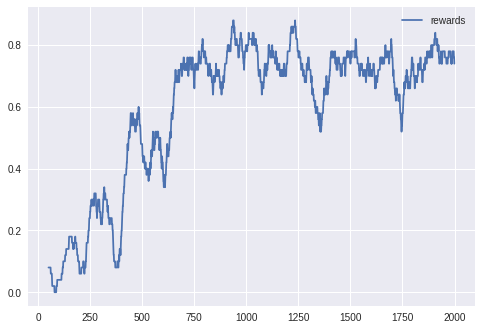

In [0]:
# Rolling average over how frequently the agent found a reward. 
trace.rolling(50).mean().plot()

### For the future
Running this a few times and watching the trace, it is easy to see the stochastic nature of the agents.  Multiple runs don't necessarily converge with only 2000 episodes. There are also built in parameters, like the discount rate, which we could vary in order to vary the agent.  Which are the optimal parameter values is not at all clear.

When we revisit this, we will try to refactor the code to more easily allow us to explore the space of possible agents.

## Neural Network based approach

There are clear limitation to the scalability of a table-like approach like the one above.  A neural network will more flexibly allow us to map sets of discrete (or continuous) states to reward values, and optimize the network in a way that we're already familiar. 

In [0]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class QNetwork:
    def __init__(self, learning_rate=0.01, state_size=16, action_size=4, 
                 hidden_size=10, name="QNetwork"):
        with tf.variable_scope(name):
            # In this case we encode the input state as a one-hot encoded vector
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')

            # One hot encode the actions to later choose the Q-value for the action
            self.actions_ = tf.placeholder(tf.int32, [None], name='actions')
            one_hot_actions = tf.one_hot(self.actions_, action_size)

            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None], name='target')

            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)

            # Output with linear activate (remember we want predictions of reward, not probabilities)
            self.output = tf.contrib.layers.fully_connected(self.fc1, action_size, activation_fn=None)

            # Optimization
            self.loss = tf.reduce_sum(tf.square(self.targetQs_  - self.output))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [0]:
state_size = 16
action_size = 4

# Learning Parameters
num_episodes = 2000
max_timesteps = 99
y = 0.99

# Exploration Paramters
explore_start = 0.5     # What's the starting probability we perform a random move
explore_stop = 0.01     # Minimum probability 
decay_rate = 0.001      # Rate at which we decay to the the minimum

# Network Parameters
hidden_size = 32        # Size of the hidden layer in the Q-network
learning_rate = 0.001   # Learning rate of our optimizer

# Memory Parameters
memory_size = 10000
batch_size = 20

In [0]:
## Works with QNetwork

# Reset the graph
tf.reset_default_graph()
qnet = QNetwork(name='main', hidden_size=hidden_size, learning_rate=learning_rate)

saver = tf.train.Saver()
#create lists to contain total rewards and steps per epsiode
step_trace = []
reward_trace = []
with tf.Session() as sess:
    # Tensorflow boilerplate
    sess.run(tf.initialize_all_variables())
    
    # The training loop
    for i in range(1, num_episodes+1):
        total_reward = 0
        Qs = None
        loss = 0
        s = env.reset()
        # Execute a full episode
        for step in range(max_timesteps):
            # Uncomment to render training
            #env.render()
            
            # Get one-hot encoding of the state
            s_ = np.identity(state_size)[s:s+1]
            # Use the state with the Q-network 
            feed = {qnet.inputs_: s_}
            Qs = sess.run(qnet.output, feed_dict=feed)
            
            # Randomly decide to explore or exploit with a decaying probability to explore
            explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*i)
            if explore_p > np.random.rand():
                # Make a random action
                action = env.action_space.sample()
            else:
                action = np.argmax(Qs)
            
            # Take action and get result
            next_state, reward, done, _ = env.step(action)
            
            total_reward += reward
                
            # Train Network
            # Once again get a one-hot encoding of the next state
            s_next_ = np.identity(state_size)[next_state:next_state+1]
            # Network then 
            q_next = sess.run(qnet.output, feed_dict={qnet.inputs_: s_next_})
            #print(q_next)
            max_q = np.max(q_next)
            target_q = Qs
            target_q[0, action] = reward + y*max_q
            
            #print(target_q)
            loss, _ = sess.run([qnet.loss, qnet.opt],
                               feed_dict={qnet.inputs_: s_,
                                          qnet.targetQs_: target_q[0, :],
                                          qnet.actions_: [action]})
            
            if done:
                if i % 50 == 0:
                    print(f'Episode: {i}',
                          f'Total reward: {total_reward}',
                          f'Training loss: {loss}',
                          f'Explore P: {explore_p}')
                reward_trace.append(total_reward)
                step_trace.append(i)
                break
            else:
                s = next_state
    
    trace = pd.DataFrame(dict(steps=step_trace, rewards=reward_trace))
    saver.save(sess, 'checkpoints/frozenlake.ckpt')
    

Episode: 50 Total reward: 0.0 Training loss: 0.0007804182241670787 Explore P: 0.47610241800534986
Episode: 100 Total reward: 0.0 Training loss: 0.00020986967138014734 Explore P: 0.4533703348376202
Episode: 150 Total reward: 0.0 Training loss: 0.020799338817596436 Explore P: 0.43174690844827834
Episode: 200 Total reward: 0.0 Training loss: 0.002874961821362376 Explore P: 0.4111780690082111
Episode: 250 Total reward: 0.0 Training loss: 0.0096318693831563 Explore P: 0.3916123837049884
Episode: 300 Total reward: 0.0 Training loss: 0.008709970861673355 Explore P: 0.3730009281340418
Episode: 350 Total reward: 0.0 Training loss: 0.20637959241867065 Explore P: 0.3552971639621696
Episode: 400 Total reward: 0.0 Training loss: 0.006213849876075983 Explore P: 0.3384568225574633
Episode: 450 Total reward: 0.0 Training loss: 0.01845725066959858 Explore P: 0.32243779429466896
Episode: 500 Total reward: 0.0 Training loss: 0.020186644047498703 Explore P: 0.3072000232591904
Episode: 550 Total reward: 1.

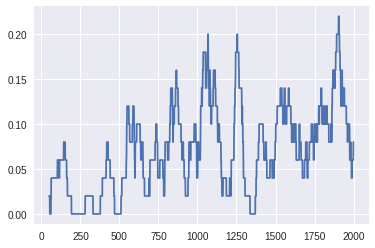

In [0]:
trace.rewards.rolling(50).mean().plot()

## Uh, oh What's happening neural network?

After some adjusting with the hyperparameters, we finally started to find an agent who learns. The biggest noticable difference is that the Q-Table worked much quicker.  The Q-Table attains success rates of around 70% at 750 episodes.  The neural network doesn't even get close to this. Already too, we can see the influence of the hyperparameters.

We will want to think about how we will explore the hyperparameter space for agents of different models. 

In [0]:
a = np.array([[0.02142065, 0.12479559, 0.02744279, 0.0824732 ]])
np.max(a)

In [0]:
state, reward, done, _ = env.step(env.action_space.sample())
state

In [0]:
np.identity(16)[5:5+1]